# Transforming uniformly generated random numbers to Gaussian distributions and verifying Central Limit Theorem

Name : Arman Kazmi

In [273]:
import numpy as np
import matplotlib.pyplot as plt

 TRANSFORMING THE GENERATED RANDOM NUMBERS TO GAUSSIAN BY "BOX-MULLER " TRANSFORM

In [274]:
def gaussian(r1,r2):
    z1 = np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*r2)
    z2 = np.sqrt(-2*np.log(r1))*np.sin(2*np.pi*r2)
    return z1,z2

Generating uniform random numbers between (0,1) and using box-muller transform they are converted to normal distribuitions.

In [275]:
rand_ = []
gaussian_ = []
for i in range(0,500):
    a = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    rand_.append(a)
    rand_.append(b)
    z3,z4 = gaussian(a,b)
    gaussian_.append(z3)
    gaussian_.append(z4)

PLOTTING THE UNIFORMLY GENERATED RANDOM NUMBERS

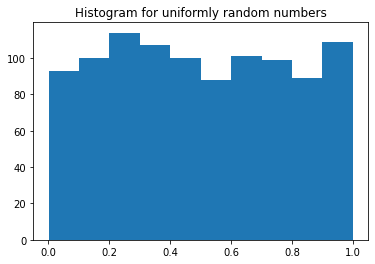

In [276]:
plt.hist(rand_)
p = plt.title("Histogram for uniformly random numbers")

Fitting a gaussian curve over  the generated histogram

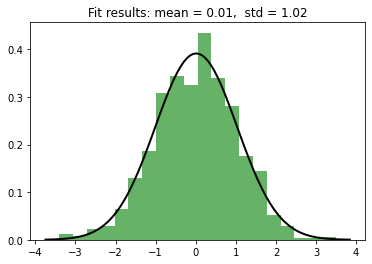

In [277]:
#fitting a gaussian curve
from scipy.stats import norm
mu, std = norm.fit(gaussian_)
plt.hist(z1,bins=20, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.show()

# Verifying Central Limit theorem 

The actual mean for random numbers between 0 and 1 should be 0.5

In [278]:
parent_mean = 0.5

In [279]:
parent_mean

0.5

taking samples = 500,1000,10000

In [280]:
def plot(sample_mean,sample):
    mu1, std1 = norm.fit(sample_mean)
    plt.hist(sample_mean,bins=20, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu1, std1)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results for "+str(sample)+" samples: mean = %.4f,  std = %.4f" % (mu1, std1)
    plt.title(title)
    plt.show()

In [281]:
#samples = 500
samples = [100,500,1000,10000,100000]
sample_mean =[]
for i in samples:
    means = []
    for j in range(0,i):
        means.append(np.mean(np.random.uniform(0,1,1000)))
    sample_mean.append(means)

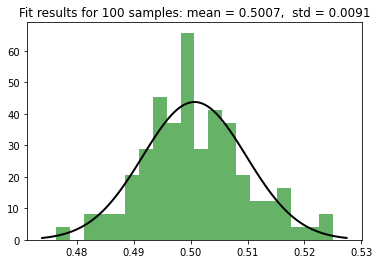

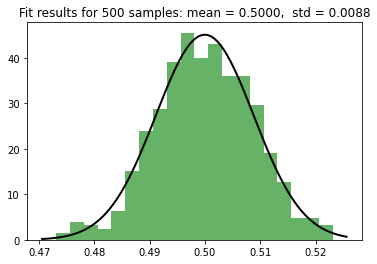

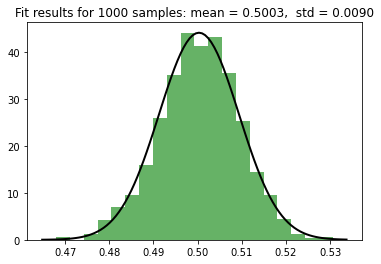

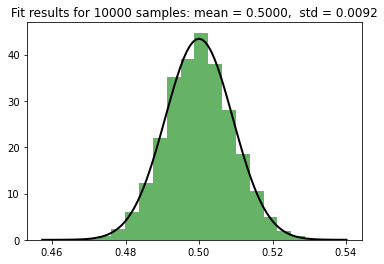

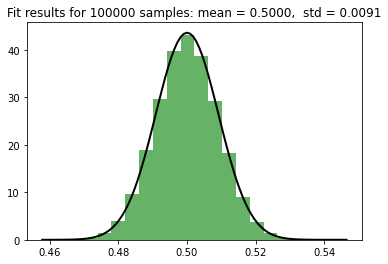

In [282]:
for i,j in zip(range(0,len(sample_mean)),samples):
    plot(sample_mean[i],j)

Error while calculating mean when the number of random variables are increased

Increasing number of random variables from 100 to 10000


In [283]:
ran_var = [100,500,1000,10000]

In [284]:
for i in ran_var:
    error = np.abs(parent_mean - np.mean(np.random.uniform(0,1,i)))
    print("When number of random variables are : %d error in mean is : %8f"%(i,error))

When number of random variables are : 100 error in mean is : 0.007493
When number of random variables are : 500 error in mean is : 0.023997
When number of random variables are : 1000 error in mean is : 0.009075
When number of random variables are : 10000 error in mean is : 0.005607


Error decreases when number of random numbers are increased